<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# https://www.tensorflow.org/tutorials/text/text_classification_rnn
# https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/data.ipynb#scrollTo=m5bz7R1xhX1f
# https://stackoverflow.com/a/49579995/3282777
# https://www.tensorflow.org/tutorials/load_data/text


# 1.0 Call libraries
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import os



In [28]:
# 1.1 More libraries
from tensorflow.keras import utils
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [3]:
# 1.2 Set numpy decimal printoptions
#      Limit display to precision of 3

np.set_printoptions(precision=3)

In [4]:
# 1.3
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Introduction to tensors
Refer this [page](https://www.tensorflow.org/guide/tensor)

Tensors are (kind of) like np.arrays. All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.   
Rank in tensor is akin to dimensions in numpy.

#### Basics

In [5]:
# 2.0 Rank 0
#     A "scalar" or "rank-0" tensor . 
#       A scalar contains a single value,
#        and no "axes".

print( tf.constant(4))

tf.Tensor(4, shape=(), dtype=int32)


In [6]:
# 2.1 Rank 1
#     A "vector" or "rank-1" tensor is like
#      a list of values. A vector has one axis:

print(tf.constant([2.0, 3.0, 4.0]))

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


In [ ]:
# 2.2 Rank 2
#     A "matrix" or "rank-2" tensor has two axes:

s=tf.constant(
              [
               [1, 2],
               [3, 4],
               [5, 6]
              ]
             )

print(s)

In [ ]:
# 2.3 Rank 3
#     There can be an arbitrary number of
#      axes (sometimes called "dimensions")

rank_3_tensor = tf.constant(
                             [
                              [
                                [0, 1, 2, 3, 4],
                                [5, 6, 7, 8, 9]
                               ],
                              [
                                [10, 11, 12, 13, 14],
                                [15, 16, 17, 18, 19]
                               ],
                              [
                               [20, 21, 22, 23, 24],
                               [25, 26, 27, 28, 29]
                               ],
                             ]
                            )

rank_3_tensor


#### Tensor to numpy

Convert a tensor to numpy array using `np.array` method or using `tensor.numpy` method:

In [ ]:
# 3.0 Tensor to numpy
np.array(s)
print()
s.numpy()
print()
np.array(rank_3_tensor)
print()
rank_3_tensor.numpy()

#### Basic maths on tensors

Basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

In [11]:
# 3.1
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 2],
                 [1, 0]])
c = tf.ones([2,3])

In [ ]:
# 3.2
a+b
print()
tf.add(a,b)

print()
a * b
print()
tf.multiply(a,b)

print()
tf.matmul(a,b)


In [ ]:
# 3.3 This fails. Tensors are very sensitive 
#     to data types

r = tf.constant([1.0,2.0], shape = [2,1])
p = tf.constant(5)
r * p

In [ ]:
# 3.4 This also fails
#      even though both operands
#       are floats

r = tf.constant([1.0,2.0], shape = [2,1])
r
p = tf.constant(5)
r * tf.cast(p, tf.float16)

In [ ]:
# 3.5 This succeeds

r = tf.constant([1.0,2.0], shape = [2,1])
r
p = tf.constant(5)
r * tf.cast(p, tf.float32)

Some operations on tensors

In [ ]:
# 4.0
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# 4.1 Find the largest value
print(tf.reduce_max(c))

# 4.2 Find the index of the largest value
print(tf.argmax(c))

# 4.3 Compute the softmax
#     Note that each 'row'
#     (or axis 0) or putput 
#     sums to 1
print(tf.nn.softmax(c))


#### Some vocabulary
Tensors have shapes. Some vocabulary:

> **Shape**: The length (number of elements) of each of the axes of a tensor.  
> **Rank**: Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.  
> **Axis** or Dimension: A particular dimension of a tensor.  
> **Size**: The total number of items in the tensor, the product shape vector.


In [169]:
# 5.0
rank_4_tensor = tf.zeros([3, 2, 4, 5])
# axis 0 is 3
# axis -1 is 5



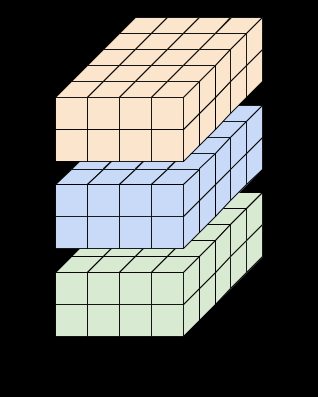


In [ ]:
# 5.2 Like in numpy arrays, we have attributes:
#      dtype, ndim, shape

rank_4_tensor.dtype
print()
rank_4_tensor.ndim
print()
rank_4_tensor.shape
print()
rank_4_tensor.shape[0]
print()
rank_4_tensor.shape[-1]
print()
tf.size(rank_4_tensor).numpy()

It is important to keep in mind inherent or implied meaning of each axis. In the above example, here are the implied meanings: 

*Batch size:* 3  
*Depth*:      2  
*Width*:      4  
*Height*:     5 

### Indexing (See [here](https://www.tensorflow.org/guide/tensor#indexing))

Single-axis indexing

TensorFlow follows standard Python indexing rules, similar to indexing a list or a string in Python, and the basic rules for NumPy indexing.

> indexes start at 0  
> negative indices count backwards from the end  
> colons, :, are used for slices: start:stop:step

In [54]:
# 6.0 Sample 1-axes tensor
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())


[ 0  1  1  2  3  5  8 13 21 34]


In [ ]:
# 6.2 Indexing with a : slice keeps the axis:

#6.2.1 Everything
rank_1_tensor[:].numpy()
print()

#6.2.2 Before 4:
rank_1_tensor[:4].numpy()
print()

#6.2.3 From 4 to the end
rank_1_tensor[4:].numpy()
print()

#6.2.4 From 2, before 7:
rank_1_tensor[2:7].numpy()
print()

#6.2.5 Every other item
rank_1_tensor[::2].numpy()
print()

#6.2.6 Reversed
rank_1_tensor[::-1].numpy()
print()

### Manipulating shapes

In [ ]:
# 7.0 Shape returns a `TensorShape` object
#     that shows the size along each axis

x = tf.constant([[1], [2], [3]])
print(x.shape)


You can reshape a tensor into a new shape. The tf.reshape operation is fast and cheap as the underlying data does not need to be duplicated.

In [ ]:
# 7.1 You can reshape a tensor to a new shape.
#     Note that you're passing in a list

reshaped = tf.reshape(x, [1, 3])
reshaped.shape

In [ ]:
# 7.2 We created this tensor earlier

print(rank_3_tensor)

If you flatten a tensor you can see what order it is laid out in memory.

In [ ]:
#7.3  A `-1` passed in the `shape` argument
#     says "Whatever fits".

print(tf.reshape(rank_3_tensor, [-1]))

Typically the only reasonable use of tf.reshape is to combine or split adjacent axes (or add/remove 1s).

For this 3x2x5 tensor, reshaping to (3x2)x5 or 3x(2x5) are both reasonable things to do, as the slices do not mix:

In [ ]:
# 7.4
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

#### Reshaping can be a mess

Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes. It will be a mess.

In [ ]:
# 8.0 Bad examples: don't do this
#     Only multiply adjacent indices

# 8.1 You can't reorder axes with reshape.
print(tf.reshape(rank_3_tensor, [2, 3, 5]), "\n") 

# 8.2 This is a mess
print(tf.reshape(rank_3_tensor, [5, 6]), "\n")


### Broadcasting

Broadcasting is a concept borrowed from the equivalent feature in NumPy. In short, under certain conditions, smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

The simplest and most common case is when you attempt to multiply or add a tensor to a scalar. In that case, the scalar is broadcast to be the same shape as the other argument. 

In [178]:
# 9.0
x = tf.constant([1, 2, 3])
y = tf.constant(2)
z = tf.constant([2, 2, 2])

In [ ]:
# 9.1
x * y
x + z

Likewise, axes with length 1 can be stretched out to match the other arguments. Both arguments can be stretched in the same computation.

In this case a 3x1 matrix is element-wise multiplied by a 1x4 matrix to produce a 3x4 matrix. Note how the leading 1 is optional: The shape of y is [4].

In [ ]:
# 9.2 These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)

# 9.2.1
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))


In [ ]:
# 9.2.2
x = tf.constant([1, 2, 3])
y = tf.constant(2)
z = tf.constant([2, 2, 2])

# 9.2.3 All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)


#### Logical operations

In [ ]:
# 9.3 Logical operations on tensors
#     Pl refer: tf.math
#           https://www.tensorflow.org/api_docs/python/tf/math

print(tf.constant([1,2,10]) < 5)
print(tf.constant([True, False, True,True], dtype = tf.bool))

# 9.4 A tensor can be reshaped as per its shape argument

print(tf.constant(np.arange(20), shape = [5,4])) 
x = tf.constant(np.arange(20), shape = [5,4])
# Display Ist two rows and columns
x[: 2, :2]

In [ ]:
# 9.5 Show first and third rows
#     This works as an exception

x[tf.constant([True, False,True,False, False], dtype = tf.bool)]

# But the following do not work:
# Valid indices are: integers, slices (`:`),
#    ellipsis (`...`), tf.newaxis (`None`)
#      and scalar tf.int32/tf.int64 tensors 

#x[
#   tf.constant([True, False,True,False, False], dtype = tf.bool),
#   tf.constant([True, False,True,False], dtype = tf.bool)
#  ]

#x[
#   tf.constant([1,0,0,1,0], dtype = tf.int32),
#   tf.constant([1,0,1,0], dtype = tf.int32)
#  ]


### Custom loss function
Refer: Page 384 of Book by Aurelion

In [60]:
# 10.0 Define a model
import pandas as pd
from tensorflow import keras
from sklearn.datasets import load_boston
# 10.1
X,y = load_boston(return_X_y= True)
X.shape   # (506, 13)
# 10.2
model = keras.models.Sequential(
                                 [
                                  keras.layers.Dense(5, activation = 'relu'),
                                  keras.layers.Dense(1,activation = 'sigmoid')
                                 ]
                               )


(506, 13)

#### Huber loss

For a comparative picture of loss functions being used in Regression, see [here](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0). Briefly, if data is noisy, use MAE and if their are more outliers or noise, use huber loss.  

Huber loss is less sensitive to outliers in data than the squared error loss. It’s also differentiable at 0 (unlike MAE). It’s basically absolute error, which becomes quadratic when error is small. How small that error has to be to make it quadratic depends on a hyperparameter, 𝛿 (delta), which can be tuned.   


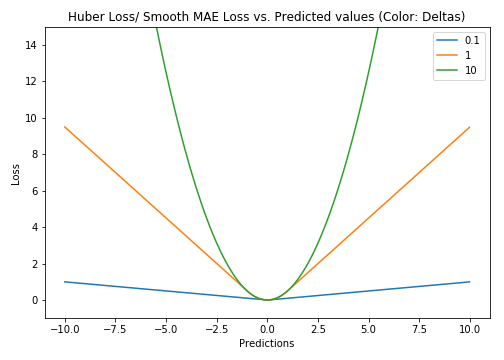





In [62]:
# 10.3 Custom loss function
def huber_loss(y_true,y_pred):
  error = y_true - y_pred
  is_small_error = tf.abs(error) < 1.0
  squared_loss = tf.square(error) / 2.0
  linear_loss = tf.abs(error) - 0.5
  return tf.where(is_small_error, squared_loss, linear_loss)



In [ ]:
# 10.4 Compile and run the model with our loss function
model.compile(loss= huber_loss, metrics = "mse", optimizer = "nadam")
model.fit(X,y,epochs = 20)

#### Generate random tensors
Refer this [article](https://www.tensorflow.org/guide/random_numbers)

In [ ]:
# 11.0 Generate random data using
#      Generator object
g1 = tf.random.Generator.from_seed(1)

# 2.0.1 Use object 'g1'
g1.normal([2,3])
print()
# 2.0.2
g1.uniform([1])
print()

# 11.1 Generate random data
#      directly
tf.random.uniform([4])    # shape is (4,)
print()
tf.random.uniform([4]).shape
print()
tf.random.uniform([4]).numpy()
print()

# 11.2
tf.random.normal(shape = (10,4), mean = 3,stddev=1.3)
print()
tf.random.normal(shape = (10,4), mean = 3,stddev=1.3).shape
print()

# 2.2
tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)

## tf.data.Dataset API
Understanding Dataset object. The `tf.data.Dataset` API supports writing descriptive and efficient **input pipelines**. Dataset usage follows a common pattern (see [here](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) and [here](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/data.ipynb#scrollTo=k_5N7CdNGYAa) ):

>  Create a source dataset from your input data.

>  Write dataset transformations to preprocess the data.

>  Iterate over the dataset and process the elements.

Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory. That is processing is performed batch-wise.  

The simplest way to create a dataset is to create it from a python list:

#### from_tensors() vs from_tensor_slices()
See this [stackoverflow answer](https://stackoverflow.com/a/49579995/3282777)  

Read `from_tensor_slices()` as `to_tensor_slices()`

In [4]:
# 1.0 Call libraries
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [26]:
# 1.1 More libraries
from tensorflow.keras import utils
from tensorflow.keras import preprocessing
import pathlib
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [5]:
# 1.2 Set numpy decimal printoptions
#      Limit display to precision of 3

np.set_printoptions(precision=3)

In [6]:
# 1.3
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# 2.0 Read from_tensor_slices as to_tensor_slices()
# 2.0.1 from_tensor_slices()
dataset1 = tf.data.Dataset.from_tensor_slices([[1,2],[3,4],[5,6]])
# 2.0.2 from_tensors
dataset2 = tf.data.Dataset.from_tensors([[1,2],[3,4],[5,6]])

In [8]:
# 2.1 Print the two objects
dataset1
print()
dataset2

<TensorSliceDataset shapes: (2,), types: tf.int32>

<TensorDataset shapes: (3, 2), types: tf.int32>

In [9]:
# 2.2 Extract each element from
#      dataset. dataset is iterable.
#       Four elements. Each has two values

for elem in dataset1:
  print("--")
  print(elem.numpy())

--
[1 2]
--
[3 4]
--
[5 6]


In [10]:
# 2.2.1 Just one element

for elem in dataset2:
  print("--")
  print(elem)

--
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


In [11]:
# 2.3
dataset3 = tf.data.Dataset.from_tensor_slices(
                                              (
                                               tf.random.uniform([4]), # shape [4]
                                               tf.random.normal(
                                                                [4, 6],
                                                                mean=1.5,
                                                                stddev=2.2
                                                                ) 
                                               )
                                              )

In [12]:
# 2.3.1 Print contents
for elem in dataset3:
  # Four elements.
  # Each element is a tuple of two tensors
  # one from uniform and the other from normal dist
  print(elem)   


(<tf.Tensor: shape=(), dtype=float32, numpy=0.2308768>, <tf.Tensor: shape=(6,), dtype=float32, numpy=array([-1.476,  7.276,  0.228,  3.193,  2.923,  0.521], dtype=float32)>)
(<tf.Tensor: shape=(), dtype=float32, numpy=0.8270308>, <tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 2.976, -1.021,  1.489, -1.378,  5.806, -1.429], dtype=float32)>)
(<tf.Tensor: shape=(), dtype=float32, numpy=0.14125514>, <tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.491, 4.323, 2.083, 3.948, 2.935, 2.654], dtype=float32)>)
(<tf.Tensor: shape=(), dtype=float32, numpy=0.57362044>, <tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 1.875,  1.325,  1.823, -1.774,  5.792,  3.923], dtype=float32)>)


In [13]:
# 2.4 Next same internal contents but using from_tensors
dataset4 = tf.data.Dataset.from_tensors(
                                         (
                                           tf.random.uniform([4]),    # shape [4]
                                           tf.random.normal([4, 6], mean=1.5,stddev=2.2) # [4,100]
                                          )
                                        )

In [14]:
# 2.4.1
for elem in dataset4:
  # One element
  # This elem is a tuple of two tensors
  print()
  print(elem)   


(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.52 , 0.01 , 0.11 , 0.324], dtype=float32)>, <tf.Tensor: shape=(4, 6), dtype=float32, numpy=
array([[ 2.189,  1.342,  2.591, -0.121,  0.247,  2.917],
       [ 2.694,  2.623,  1.488,  5.46 , -0.065,  1.36 ],
       [ 0.13 ,  2.027, -3.341,  3.226,  4.435,  2.126],
       [ 0.062, -0.098,  0.346, -0.038,  2.953,  2.251]], dtype=float32)>)


In [ ]:
#help(tfds.load)

### Dataset object from numpy-arrays in memory

If all data is in memory, to create a `Dataset` object, use  `Dataset.from_tensor_slices()` on numpy arrays (in memory).

In [15]:
# 3.0 Download numpy arrays to 
#     two objects (train,test) in memory

# 3.0.1 First delete any existing folder

!rm -rf /root/.keras/datasets
!ls -la /root/.keras

total 16
drwxr-xr-x 2 root root 4096 Mar 11 05:52 .
drwx------ 1 root root 4096 Mar 11 05:52 ..
-rw-r--r-- 1 root root  123 Mar 11 05:52 keras.json


In [16]:
# 3.0.2 Next download data:
train, test = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [17]:
# 3.0.3 Check downloaded files
! ls -la /root/.keras/datasets

total 12
drwxr-xr-x 3 root root 4096 Mar 11 06:07 .
drwxr-xr-x 3 root root 4096 Mar 11 06:07 ..
drwxr-xr-x 2 root root 4096 Mar 11 06:07 fashion-mnist


In [18]:
# 4.1 Little more checking:

type(train)
print()
type(train[0])
print()
type(test[0])

tuple

numpy.ndarray

numpy.ndarray

In [19]:
# 4.2 Separate images and labels:
images,labels = train

# 4.2.1 Do something with images
images = images/255

In [20]:
# 4.3 Create Dataset object. 
#      It is similar to way we did in #3.3 above:

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
type(dataset)
dataset

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

### Dataset object from textfiles on disk
Please see this [tutorial](https://www.tensorflow.org/tutorials/load_data/text). We are downloading files from stackoverflow. The file contains questions asked on some subjects. (This section is to be completed.)

#### Consuming text files

##### Download file from a url
How to download a file from a URL.
This way any file can also be downloaded from *gdrive* without mounting it. Uses [`get_file()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file) utility of `tf.keras.utils`. See this [example](https://www.tensorflow.org/tutorials/load_data/text).

In [ ]:
# 5.0 Which files are where:

!ls -la /root/.keras/
!ls -la /root/.keras/datasets

# 5.0.1 Deleting datasets dir
!rm -rf /root/.keras/datasets


In [37]:
# 5.1 Specify file URL from stackoverflow.
#     Our file: stack_overflow_16k.tar.gz

data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

# 5.1.1 Use keras get_file() utility
dnld = utils.get_file(
                           'stack_overflow_16k.tar.gz',  
                            data_url,
                            untar=True,
                          )

# 5.1.2 Where is 'dnld' object?
#       Get its path
dnld_dir = pathlib.Path(dnld).parent
dnld_dir     # '/root/.keras/datasets'

6053888/6053168 [==============================] - 0s 0us/step


PosixPath('/root/.keras/datasets')

In [ ]:
# 5.1.3
! ls -la /root/.keras/datasets

# 5.1.4 Result after untarring
! ls -la /root/.keras/datasets/train
! ls -la /root/.keras/datasets/test

##### Download file from gdrive

In [39]:
# 5.2 gdrive download: May also download a shared file from gdrive
#     No need to mount gdrive
#     Download 'archive.csv.zip' from my gdrive:

gdrive_url = "https://drive.google.com/file/d/14gjcWMRJORJ4bQ2QerWaodDpLi5oDcxM/view?usp=sharing"

# 5.2.1 Use keras get_file() utility
dnld_gdrive = utils.get_file(
                           'archive.csv.zip',  
                            gdrive_url,
                          )

# 5.2.2 Where is 'dataset' object?
#       Get its path
gdrive_dir = pathlib.Path(dnld_gdrive).parent
gdrive_dir   # PosixPath('/root/.keras/datasets')

   8192/Unknown - 0s 0us/step

PosixPath('/root/.keras/datasets')

In [ ]:
# 5.2.3 Check folders under 'train'
! ls -la /root/.keras/datasets/train

##### Create a dataset of text-lines

In [ ]:
# 6.0 Files in 'train/python' folder
train_dir = "/root/.keras/datasets/train/"
python_files = os.listdir(train_dir + "python")
python_files[:3]
print()

# 6.0.1 Join directory path to file-names
files_with_path = [os.path.join(train_dir, file) for file in python_files]
files_with_path[:4]

In [66]:
# 6.1 tf.data.Dataset of just filepaths
#     Prepare a dataset of all files matching
#     one or more glob patterns.

filepath_dataset_py = tf.data.Dataset.list_files("/root/.keras/datasets/train/python/*.txt")

In [62]:
# 6.2 Create a datset comprising lines from one or more text files.

data_lines = tf.data.TextLineDataset(filepath_dataset_py)

In [65]:
# 6.2.1 Examine 5 files:

for line in data_lines.take(5):
  print(line.numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=string, numpy=b'"blank submodule imports using __init__.py i\'m learning blank, and i can\'t figure out how imports in __init__.py work...i understand from the blank tutorial that the __init__.py file initializes a package, and that i can import subpackages here...i\'m doing something wrong, though. could you explain for me (and for future blank-learners) what i\'m doing wrong?..here\'s a simplified example of what i\'m trying to do...this is my file structure:..package.    __init__.py.    test.py.    subpackage.        __init__.py.        hello_world.py...the contents of hello_world.py:..def do_something():.    print ""hello, world!""...subpackage/__init__.py is empty...package/__init__.py contains:..import test.submodule.do_something...and finally, test.py contains:..do_something()...this is how i attempt to run hello_world.py using osx terminal and blank 3:..blank test.py...blank then throws the following error:..na

### Consuming csv data

See [Loading CSV Files](../tutorials/load_data/csv.ipynb), and [Loading Pandas DataFrames](../tutorials/load_data/pandas.ipynb) for more examples. The CSV file format is a popular format for storing tabular data in plain text. For example:  


In [73]:
# 7.0 Download titanic file 'train.csv'
#     from a URL:

import pandas as pd
titanic_file = tf.keras.utils.get_file(
                                       "train.csv",
                                       "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
                                       )

In [74]:
# 7.1 Read downloaded file:

df = pd.read_csv(titanic_file)
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


If your data fits in memory the same Dataset.from_tensor_slices method works on dictionaries, allowing this data to be easily imported:

In [ ]:
# 7.2 Transform pandas dataframe to dictionary
dict(df)

In [ ]:
# 8.0 Create tf.data.Dataset objects:
#     tensor_slice: Slices along along first dimension. 
#     This operation preserves the structure of the input
#     tensors, removing the first dimension of each tensor
#     and using it as the dataset dimension. 

titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))
type(titanic_slices)   # TensorSliceDataset

In [92]:
# 8.1 Just extract one row/batch
n = 1
for feature_batch in titanic_slices.take(n):
  for key, value in feature_batch.items():
    print("  {}:{}".format(key, value))

  survived:0
  sex:b'male'
  age:22.0
  n_siblings_spouses:1
  parch:0
  fare:7.25
  class:b'Third'
  deck:b'unknown'
  embark_town:b'Southampton'
  alone:b'n'


A more scalable approach is to load from disk as necessary. The tf.data module provides methods to extract records from one or more CSV files fron disk.

The `experimental.make_csv_dataset` function is the high level interface for reading sets of csv files. It supports column type inference and many other features, like batching and shuffling, to make usage simple.

In [83]:
# 8.2
batch_size = 4
titanic_batches = tf.data.experimental.make_csv_dataset(
                                                         titanic_file,
                                                         batch_size=batch_size,
                                                         label_name="survived"
                                                         )

In [85]:
# 8.3 Get just one batch
#     Batch size is 4

howManyBatches = 1
for feature_batch, label_batch in titanic_batches.take(howManyBatches):
  print("'survived': {}".format(label_batch))
  print("features:")
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

'survived': [1 0 1 0]
features:
  'sex'               : [b'male' b'male' b'female' b'female']
  'age'               : [ 9. 28. 40.  2.]
  'n_siblings_spouses': [1 0 1 0]
  'parch'             : [1 0 1 1]
  'fare'              : [ 15.9     7.896 134.5    10.462]
  'class'             : [b'Third' b'Third' b'First' b'Third']
  'deck'              : [b'unknown' b'unknown' b'E' b'G']
  'embark_town'       : [b'Southampton' b'Southampton' b'Cherbourg' b'Southampton']
  'alone'             : [b'n' b'y' b'n' b'n']


You can use the select_columns argument if you only need a subset of columns.

In [86]:
# 8.4
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4,
    label_name="survived", select_columns=['class', 'fare', 'survived'])

In [87]:
# 8.5
for feature_batch, label_batch in titanic_batches.take(1):
  print("'survived': {}".format(label_batch))
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

'survived': [1 1 0 0]
  'fare'              : [ 26.    135.633  27.     25.467]
  'class'             : [b'Second' b'First' b'Second' b'Third']


#### Preprocessing.text_dataset_from_directory
The `preprocessing.text_dataset_from_directory()` expects a directory structure as follows. Read more about it [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/*text_dataset_from_directory*).

main_directory/<br>
...class_a/<br>
......a_text_1.txt<br>
......a_text_2.txt<br>
...class_b/<br>
......b_text_1.txt<br>
......b_text_2.txt<br>


When running a machine learning experiment, it is a best practice to divide your dataset into three splits: train, validation, and test. The Stack Overflow dataset has already been divided into train and test, but it lacks a validation set. Create a validation set using an 80:20 split of the training data by using the validation_split argument below.






In [94]:
batch_size = 32
seed = 42

raw_train_ds = preprocessing.text_dataset_from_directory(
                                                 train_dir,
                                                 labels = "inferred",
                                                 batch_size=batch_size,
                                                 # fraction of data to 
                                                 #  reserve for validation. 
                                                 validation_split=0.2, 
                                                 # Return back 'train' subset
                                                 #  but in batches
                                                 subset='training',
                                                 seed =2 
                                                 )


Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [92]:
type(raw_train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
# Dataset.take(n) object is iterable.
# Iterate over the dataset and print out a few examples,
#  to get a feel for the data.
# take(n): Reads n batches

for text_batch, label_batch in raw_train_ds.take(1):
  print(text_batch.numpy().shape)  # 32: batch_size
                                   # Change batch_size to see how it changes
  for i in range(10):
    print("Question: ", text_batch.numpy()[i])
    print("Label:", label_batch.numpy()[i])


In [103]:
# Get class_names in the dataset:
for i, label in enumerate(raw_train_ds.class_names):
  print("Label", i, "corresponds to", label)


Label 0 corresponds to csharp
Label 1 corresponds to java
Label 2 corresponds to javascript
Label 3 corresponds to python


In [80]:
# From train_dir pick-up remaining validation
#  dataset but in batches:

raw_validation_ds = preprocessing.text_dataset_from_directory(
                                      train_dir,
                                      batch_size=batch_size,
                                      validation_split=0.2,
                                      # Return validation data
                                      # but in batches
                                      subset='validation'
                                  )


Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [107]:
test_dir = dataset_dir/'test'

raw_test_ds = preprocessing.text_dataset_from_directory(
                              test_dir,
                              batch_size=batch_size
                              )


Found 8000 files belonging to 4 classes.


### Text Vectorization

#### Using `preprocessing.TextVectorization` layer. Its [full syntax](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) is:

`tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=None, standardize=LOWER_AND_STRIP_PUNCTUATION,
    split=SPLIT_ON_WHITESPACE, ngrams=None, output_mode=INT,
    output_sequence_length=None, pad_to_max_tokens=True, vocabulary=None, **kwargs
)
`

Next, we will standardize, tokenize, and vectorize the data using the preprocessing.TextVectorization layer.

> Standardization refers to preprocessing the text, typically to remove punctuation or HTML elements to simplify the dataset.

> Tokenization refers to splitting strings into tokens (for example, splitting a sentence into individual words by splitting on whitespace).

> Vectorization refers to converting tokens into numbers so they can be fed into a neural network.

All of these tasks can be accomplished with this layer. You can learn more about each of these in the API doc.

> The default standardization converts text to lowercase and removes punctuation.

> The default tokenizer splits on whitespace.

> The default vectorization mode is int. This outputs integer indices (one per token). This mode can be used to build models that take word order into account. You can also use other modes, like binary, to build bag-of-word models.


In [89]:
VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 250

# Instantiate TextVectorization class
int_vectorize_layer = TextVectorization(
                                         max_tokens=VOCAB_SIZE,
                                         output_mode='int',
                                         output_sequence_length=MAX_SEQUENCE_LENGTH
                                        )


In [85]:
#binary_vectorize_layer = TextVectorization(
#                                            max_tokens=VOCAB_SIZE,
#                                            output_mode='binary'
#                                            )

In [86]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda text, labels: text)


In [ ]:
# 'adapt' or 'fit' over 'int_vectorize_layer'
#   object. 'adpat' fits the state of the preprocessing
#     layer to the dataset.

int_vectorize_layer.adapt(
                          # The data to train on. 
                          #   It can be passed either as
                          #     a tf.data Dataset, as a NumPy array
                           train_text # 
                          )
#binary_vectorize_layer.adapt(train_text)

In [111]:
int_vectorize_layer.get_vocabulary()[:4]

['', '[UNK]', 'the', 'i']

In [113]:
# Retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_question, first_label = text_batch[0], label_batch[0]
print("Question", first_question)
print("Label", first_label)

Question tf.Tensor(b'"blank8 why is my solution faster than the neat solution? (hackerrank chocolate feast) edit: simplified my solution..edit: removed opinion based secondary question...background: atarted learning blank a week or two ago using hackerranks problems as exercises and stackoverflow search + google as my teacher, i\'ve had some limited experience learning other languages...i did the exercise my own ""noobish learner way"" which i can\'t help but feel is a ""botched job"" when i see ""neat &amp; short"" solutions...however, when submitting both solutions one after another a couple of times i found the ""neat"" solution was quite a bit slower. ..i vaguely remember something about % operations being costly, is mine faster because of no % operations or is there more to it than just that?..exercise: https://www.hackerrank.com/challenges/chocolate-feast..neat solution from discussion:..import blank.io.*;.import blank.util.*;..public class solution {.    static int cc; .    publ

In [128]:
# Expand 
type(first_question)
print("\n--------------\n")
first_question.get_shape()
print("\n--------------\n")
t = tf.expand_dims(first_question,-1)
t.get_shape()
print("\n--------------\n")
print(t)
print("\n--------------\n")


tensorflow.python.framework.ops.EagerTensor


--------------



TensorShape([])


--------------



TensorShape([1])


--------------

tf.Tensor([b'"blank8 why is my solution faster than the neat solution? (hackerrank chocolate feast) edit: simplified my solution..edit: removed opinion based secondary question...background: atarted learning blank a week or two ago using hackerranks problems as exercises and stackoverflow search + google as my teacher, i\'ve had some limited experience learning other languages...i did the exercise my own ""noobish learner way"" which i can\'t help but feel is a ""botched job"" when i see ""neat &amp; short"" solutions...however, when submitting both solutions one after another a couple of times i found the ""neat"" solution was quite a bit slower. ..i vaguely remember something about % operations being costly, is mine faster because of no % operations or is there more to it than just that?..exercise: https://www.hackerrank.com/challenges/chocolate-feast..neat solution from discussion:..import blank.io.*;.import blank.util.*;..public class solution {.    static int cc; 

In [134]:

int_vectorize_layer(t)

<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[   1,  111,    6,   23,  299, 1787,  198,    2, 3623,  299, 7826,
           1,    1,  805, 2568,   23,    1, 1218, 3892,  364, 4145,    1,
           1,  661,   16,    5,  981,   45,  121, 1881,   47,    1,  742,
          36, 9987,    8, 1982,  322,  662,   36,   23, 2362,  195,  543,
          83, 2693, 2609,  661,  144,    1,  411,    2, 1371,   23,  657,
           1, 6520,   84,   66,    3,  166,  104,   26, 1182,    6,    5,
           1, 1639,   44,    3,  189, 3623,  519, 1135,    1,   44, 5468,
         280, 1272,   71,  156,  157,    5, 1759,    9,  331,    3,  227,
           2, 3623,  299,  115,  810,    5,  547, 3833,    3,    1, 2371,
         146,  202, 1195,  289,    1,    6, 2179, 1787,  193,    9,  136,
        1195,   45,    6,   67,  181,    4,   11,  198,  106,    1,    1,
         299,   31,    1, 2216, 1924,   29,  299,   53,   28, 2081,   22,
          53,   42,  170,  154,  256,    7,   15,  453,   28,   

In [137]:
def int_vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return int_vectorize_layer(text) , label

In [132]:
# Retrieve a batch (of 32 reviews and labels) 
#  from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_question, first_label = text_batch[0], label_batch[0]
print("Question", first_question)
print("Label", first_label)


Question tf.Tensor(b'"simple program not giving desired output i am starting to learn blank and i have a simple program to request two numbers from the user and add them together. when i run my program , i get asked for the first number , i type it in and that\'s it, the program doesn\'t go any further. i am running it in visual studio..can anyone tell me what i\'m doing wrong? ..using system;..namespace coding.{.    class program.    {.        static void main(string[] args).        {..            int number1;.            int number2;.            int result;...            console.writeline(""enter first  number to be calculated"");.            number1 = convert.toint32(console.readline());...            console.writeline(""enter second  number to be calculated"");.            number2 = convert.toint32(console.readline());..            result = number1 + number2;.            console.writeline(""the total is"" + "" "" + result);.        }.    }.}...result screenshot"\n', shape=(), dtype

In [138]:
print("'int' vectorized question:",
      int_vectorize_text(first_question, first_label)[0])

'int' vectorized question: tf.Tensor(
[ 241   86   20  696 1050  126    3   34  753    4  964   16    8    3
   17    5  241   86    4  524  121  183   31    2   99    8  125  191
  947   44    3  138   23   86    3   41  912   12    2   98   68    3
  122   11    7    8  712   11    2   86  178  301   76 1533    3   34
  309   11    7  821    1  285  412   74   55   52  210  151   47 4458
  859   29   86   53   42  170  154   28 1991   28 2177   28  128 2206
   98   68    4   33 2082 1991 1965 2206  199   68    4   33 2082 2177
 1965  128 1991 2177 2722  267    6  128  128 2570    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    

In [136]:
print("'int' vectorized question:",
      int_vectorize_text(first_question, first_label)[0])


'int' vectorized question: tf.Tensor(
[[ 241   86   20  696 1050  126    3   34  753    4  964   16    8    3
    17    5  241   86    4  524  121  183   31    2   99    8  125  191
   947   44    3  138   23   86    3   41  912   12    2   98   68    3
   122   11    7    8  712   11    2   86  178  301   76 1533    3   34
   309   11    7  821    1  285  412   74   55   52  210  151   47 4458
   859   29   86   53   42  170  154   28 1991   28 2177   28  128 2206
    98   68    4   33 2082 1991 1965 2206  199   68    4   33 2082 2177
  1965  128 1991 2177 2722  267    6  128  128 2570    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0

## New Section

In [79]:
dataset, info = tfds.load(
                           'imdb_reviews',
                            with_info=True,
                            as_supervised=True
                          )


In [ ]:
type(dataset)    # dict
dataset.keys()   # _keys(['test', 'train', 'unsupervised'])

dict_keys(['test', 'train', 'unsupervised'])

In [ ]:
train_dataset, test_dataset = dataset['train'], dataset['test']


In [ ]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
for example, label in train_dataset.take(2):
  print('text: ', example.numpy())
  print('label: ', label.numpy())


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64      # Try 2 and see what happens


In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
# Creates a `Dataset` with at most `count` elements from this dataset.
help(train_dataset.take)
dataset = tf.data.Dataset.range(10)
dataset = dataset.take(3)
list(dataset.as_numpy_iterator())

In [ ]:
# Each take is of batch size
for example, label in train_dataset.take(3):
  print('texts: ', example.numpy().shape)
  print('texts: ', example.numpy()[:4])
  print()
  print('labels: ', label.numpy()[:4])


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization
# Text vectorization layer.
VOCAB_SIZE=1000

encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
                                                                         max_tokens=VOCAB_SIZE
                                                                       )



In [ ]:
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
encoder.get_vocabulary()[:20]

In [ ]:
help(encoder(example))

In [ ]:
example

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [ ]:
print([layer.supports_masking for layer in model.layers])


[False, True, True, True, True]


In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])


In [ ]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])


[0.0159057]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)   
# Each epoch takes 690 secs on TPU

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


In [26]:
dataset3 = tf.data.Dataset.from_tensors(
                                         (
                                           tf.random.uniform([4]),    # shape [4]
                                           tf.random.normal([4, 6], mean=1.5,stddev=2.2) # [4,100]
                                          )
                                        )